In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import yfinance as yf
start_date = '2012-01-01'
end_date = '2023-07-21'
df = yf.download('AAPL', start=start_date, end=end_date)
print(df)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.482928   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.550012   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.689341   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.821992   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.801655   
...                ...         ...         ...         ...         ...   
2023-07-14  190.229996  191.179993  189.630005  190.690002  190.690002   
2023-07-17  191.899994  194.320007  191.809998  193.990005  193.990005   
2023-07-18  193.350006  194.330002  192.419998  193.729996  193.729996   
2023-07-19  193.100006  198.229996  192.649994  195.100006  195.100006   
2023-07-20  195.089996  196.470001  192.500

In [ ]:
df.shape

(2905, 6)

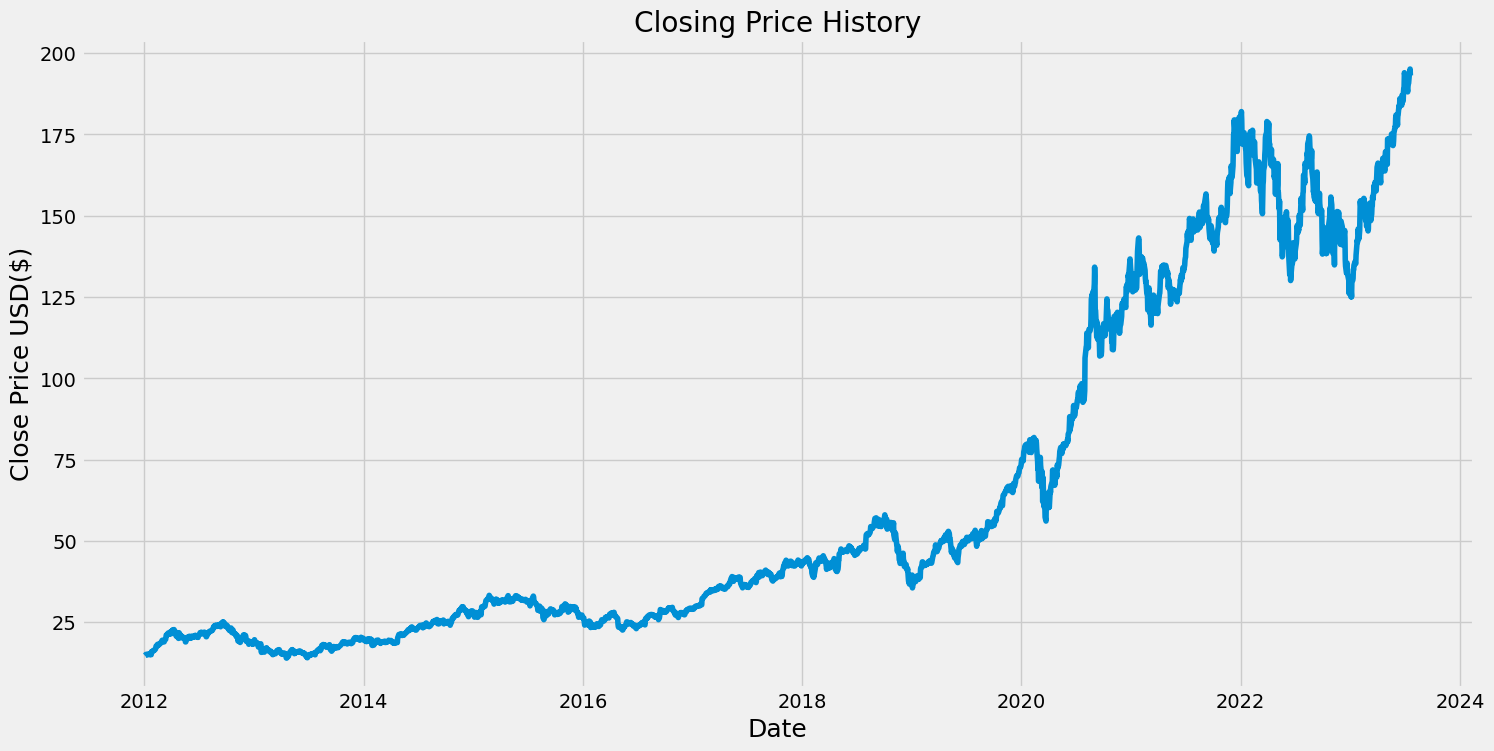

In [ ]:
#Visulation closing price history
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the " Close Column"
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*0.8)

training_data_len

2324

In [ ]:
#Scale the Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00408101],
       [0.00451671],
       [0.00542163],
       ...,
       [0.99243725],
       [1.        ],
       [0.98912518]])

In [ ]:
#Create traing data set
#Crdeate scaled traing dataset
train_data=scaled_data[0:training_data_len,:]
#Split the Data into X_train and Y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()




[array([0.00408101, 0.00451671, 0.00542163, 0.00628318, 0.00615109,
       0.00644879, 0.00631275, 0.00608406, 0.00577256, 0.00673663,
       0.00760606, 0.00733794, 0.00586916, 0.0072709 , 0.00589085,
       0.01106605, 0.01066584, 0.01118828, 0.01231795, 0.01300206,
       0.01294489, 0.01273394, 0.01363295, 0.01447872, 0.01543688,
       0.01698451, 0.02023552, 0.0202848 , 0.02209465, 0.02344709,
       0.0211227 , 0.02201775, 0.02200001, 0.02450974, 0.02415289,
       0.02481334, 0.02600019, 0.02666065, 0.02856315, 0.02994911,
       0.03034932, 0.03048931, 0.02811956, 0.02754782, 0.0276326 ,
       0.0298604 , 0.03048734, 0.03183388, 0.03500799, 0.03924278,
       0.03845024, 0.03845221, 0.04151396, 0.04247211, 0.04178996,
       0.04116697, 0.04051835, 0.0426732 , 0.04415183, 0.04477088])]
[0.04324099061358447]

[array([0.00408101, 0.00451671, 0.00542163, 0.00628318, 0.00615109,
       0.00644879, 0.00631275, 0.00608406, 0.00577256, 0.00673663,
       0.00760606, 0.00733794, 0.00

In [ ]:
#Convert X_train and Y_train in to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
#Reashape the data
x_train=np.reshape(x_train,(x_train.shape[0],60,1))
x_train.shape

(2264, 60, 1)

In [ ]:
#Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=3)

Epoch 1/3
2264/2264 [==============================] - 75s 33ms/step - loss: 1.4237e-04
Epoch 2/3
2264/2264 [==============================] - 73s 32ms/step - loss: 1.1688e-04
Epoch 3/3
2264/2264 [==============================] - 73s 32ms/step - loss: 1.2065e-04


In [ ]:
 #Create the testing data set
#Create a new array containing scaled value from index 2322 to 2902
test_data=scaled_data[training_data_len-60:,:1]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [ ]:
#Reshape the data to numpy array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get the model predicted price value
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 [==============================] - 0s 19ms/step


In [ ]:
#Get the RMSE error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.1003859186746987

<ipython-input-42-dfe273412a37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


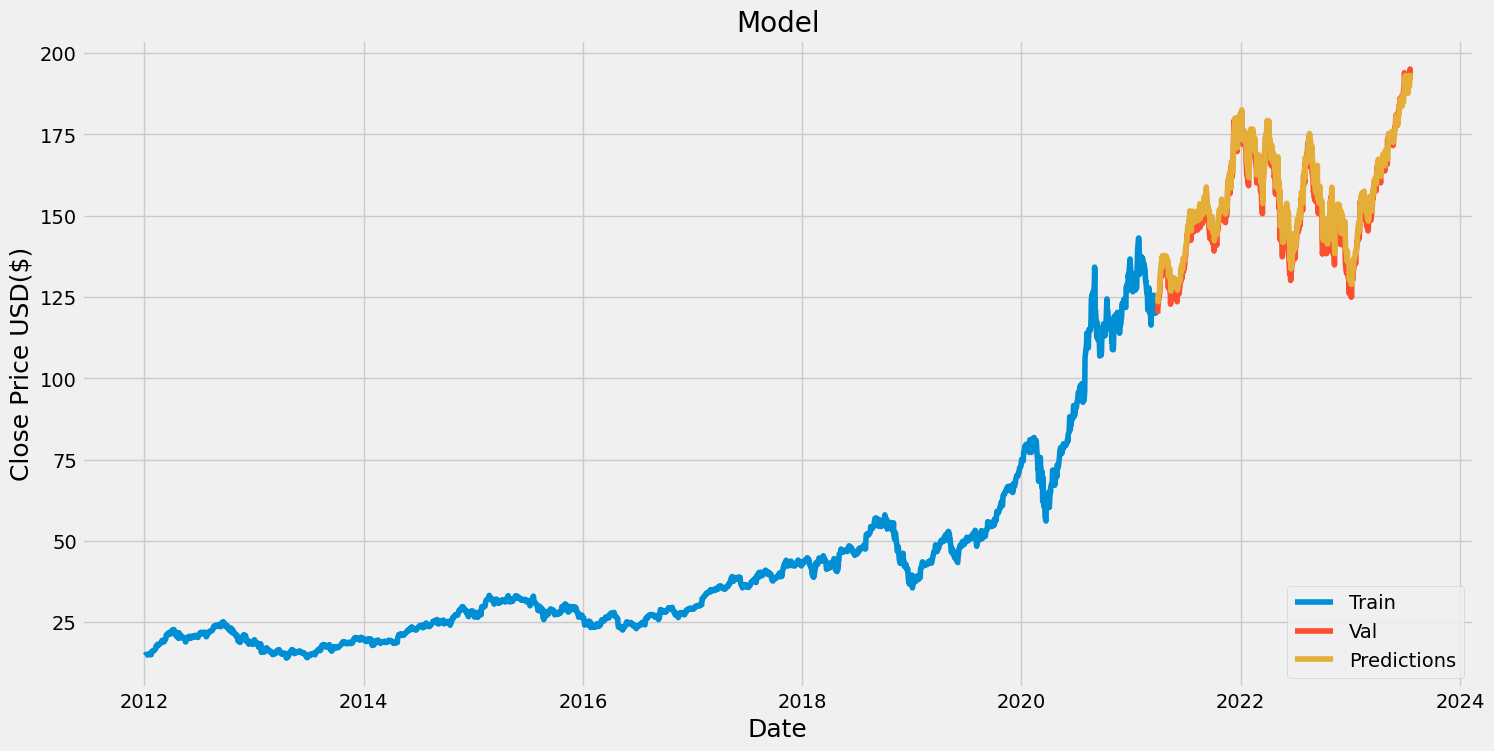

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#Show the valid and Predicted price
valid

,Close,Predictions
Date,,
2021-03-30,119.900002,124.938133
2021-03-31,122.150002,123.542465
2021-04-01,123.000000,125.818542
2021-04-05,125.900002,126.340431
2021-04-06,126.209999,129.170090
...,...,...
2023-07-14,190.690002,189.600082
2023-07-17,193.990005,189.766296
2023-07-18,193.729996,193.102280


In [ ]:
import yfinance as yf

# Get the quote
apple_quote = yf.download('AAPL', start='2023-07-19', end='2023-07-21')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
x_test = []

# Append the past 60 days
x_test.append(last_60_days_scaled)

# Convert the x_test data set to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(x_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 25ms/step
[[177.53493]]


In [ ]:
import yfinance as yf

# Get the quote for a range of dates
apple_quote2 = yf.download('AAPL', start='2023-07-19', end='2023-07-21')

# Print the closing prices
print(apple_quote2['Close'])


[*********************100%***********************]  1 of 1 completed
Date
2023-07-19    195.100006
2023-07-20    193.130005
Name: Close, dtype: float64
